In [1]:
import scanpy as sc
import pandas as pd
import numpy as n

In [2]:
healthy = sc.read_h5ad("GSE174188/GSE174188_Healthy.h5ad")
healthy

AnnData object with n_obs × n_vars = 486418 × 1999
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
cell_type = list(set(healthy.obs.cell_type))
cell_type

['Monocyte', 'PB', 'CD8 T', 'Prolif', 'Progen', 'NK', 'CD4 T', 'DC', 'B']

# remove < 0.5%

In [4]:
sample = list(set(healthy.obs.ind_cov))

rows_to_remove = []
for i in sample:
    healthy = healthy[healthy.obs.Status == "Healthy", :]
    if healthy[healthy.obs.ind_cov == i,:].n_obs < healthy.n_obs*0.005:
        rows_to_remove.append(i)
    healthy_filter = healthy[~healthy.obs.ind_cov.isin(rows_to_remove),:]    
    
healthy_filter

View of AnnData object with n_obs × n_vars = 474740 × 1999
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# separate each person

In [5]:
sample = list(set(healthy_filter.obs.ind_cov))

personal = {}
for i in sample:
    if i not in personal:
        personal[i] = healthy[healthy.obs.ind_cov == i, :]
# 將personal進行排序
sorted_personal = dict(sorted(personal.items(), key=lambda x: x[1].obs.Age[0]))

In [25]:
with open("pearson_negative_celltype_genes_top200_remove 0.5%_ENSG.csv", 'r') as file:
    negative_top200 = pd.read_csv(file, index_col = 0)
with open("pearson_positive_celltype_genes_top200_remove 0.5%_ENSG.csv", 'r') as file:
    positive_top200 = pd.read_csv(file, index_col = 0)
negative_top200

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Prolif,ENSG00000169435,ENSG00000173821,ENSG00000125148,ENSG00000160613,ENSG00000113448,ENSG00000172794,ENSG00000187837,ENSG00000121895,ENSG00000010810,ENSG00000034677,...,ENSG00000054793,ENSG00000135842,ENSG00000163599,ENSG00000150527,ENSG00000077984,ENSG00000110651,ENSG00000168813,ENSG00000172867,ENSG00000153898,ENSG00000049247
NK,ENSG00000164825,ENSG00000198851,ENSG00000115523,ENSG00000231500,ENSG00000197971,ENSG00000140030,ENSG00000143184,ENSG00000142089,ENSG00000109321,ENSG00000185338,...,ENSG00000153071,ENSG00000158417,ENSG00000100100,ENSG00000005379,ENSG00000185864,ENSG00000065883,ENSG00000154310,ENSG00000198756,ENSG00000148362,ENSG00000064886
CD8 T,ENSG00000100097,ENSG00000122026,ENSG00000100100,ENSG00000168685,ENSG00000231500,ENSG00000126353,ENSG00000154814,ENSG00000074966,ENSG00000256039,ENSG00000237943,...,ENSG00000069188,ENSG00000249709,ENSG00000182463,ENSG00000267458,ENSG00000237499,ENSG00000007350,ENSG00000161267,ENSG00000272369,ENSG00000273448,ENSG00000268362
Progen,ENSG00000162747,ENSG00000110092,ENSG00000259747,ENSG00000240403,ENSG00000137259,ENSG00000213934,ENSG00000161610,ENSG00000243772,ENSG00000237343,ENSG00000205595,...,ENSG00000137642,ENSG00000170921,ENSG00000173926,ENSG00000100300,ENSG00000092853,ENSG00000240303,ENSG00000188112,ENSG00000179094,ENSG00000168497,ENSG00000139971
CD4 T,ENSG00000198502,ENSG00000122026,ENSG00000251562,ENSG00000126353,ENSG00000100100,ENSG00000168685,ENSG00000134954,ENSG00000124766,ENSG00000166669,ENSG00000070081,...,ENSG00000263874,ENSG00000126870,ENSG00000091879,ENSG00000102804,ENSG00000230148,ENSG00000234663,ENSG00000145088,ENSG00000157168,ENSG00000160229,ENSG00000165929
DC,ENSG00000272211,ENSG00000198502,ENSG00000008517,ENSG00000109321,ENSG00000237541,ENSG00000100453,ENSG00000188825,ENSG00000235162,ENSG00000132965,ENSG00000169583,...,ENSG00000135976,ENSG00000111863,ENSG00000104660,ENSG00000234572,ENSG00000113088,ENSG00000180871,ENSG00000227468,ENSG00000146433,ENSG00000187837,ENSG00000173064
B,ENSG00000110092,ENSG00000198502,ENSG00000023445,ENSG00000247982,ENSG00000237541,ENSG00000100100,ENSG00000077238,ENSG00000008517,ENSG00000196781,ENSG00000171681,...,ENSG00000185198,ENSG00000196937,ENSG00000107362,ENSG00000112486,ENSG00000188994,ENSG00000223547,ENSG00000225746,ENSG00000110042,ENSG00000163697,ENSG00000268220
Monocyte,ENSG00000134954,ENSG00000110848,ENSG00000198502,ENSG00000120738,ENSG00000155307,ENSG00000188825,ENSG00000118515,ENSG00000204103,ENSG00000008517,ENSG00000169508,...,ENSG00000138435,ENSG00000109906,ENSG00000251323,ENSG00000119632,ENSG00000163739,ENSG00000116661,ENSG00000183508,ENSG00000169583,ENSG00000135218,ENSG00000143851
PB,ENSG00000225135,ENSG00000128656,ENSG00000205595,ENSG00000224020,ENSG00000237253,ENSG00000197632,ENSG00000243772,ENSG00000215764,ENSG00000110092,ENSG00000121895,...,ENSG00000185928,ENSG00000079931,ENSG00000155307,ENSG00000172031,ENSG00000230587,ENSG00000007350,ENSG00000100721,ENSG00000067369,ENSG00000175463,ENSG00000135116


# 取交集的

In [424]:
# 把negative跟positive取交集之後的genes
# 1 2 4 5 6 7 代表 NK,CD8 T,CD4 T,DC,B,Monocyte
N_common_genes = set(negative_top200.iloc[1]).intersection(set(negative_top200.iloc[2]), set(negative_top200.iloc[4]),
                                         set(negative_top200.iloc[5]), set(negative_top200.iloc[6]),
                                         set(negative_top200.iloc[7]))
P_common_genes = set(positive_top200.iloc[1]).intersection(set(positive_top200.iloc[2]), set(positive_top200.iloc[4]),
                                         set(positive_top200.iloc[5]), set(positive_top200.iloc[6]),
                                         set(positive_top200.iloc[7]))
# 將每個gene and cell type做一個區分
N_common_genes_celltype = []
P_common_genes_celltype = []
for i in N_common_genes:
    for j in cell_type:
        if j != "PB" and j != "Prolif" and j != "Progen":
            N_common_genes_celltype.append(f"{i}_{j}")

for i in P_common_genes:
    for j in cell_type:
        if j != "PB" and j != "Prolif" and j != "Progen":
            P_common_genes_celltype.append(f"{i}_{j}")

set(N_common_genes_celltype)
set(P_common_genes_celltype)


N_common_genes_celltype

['ENSG00000205595_Monocyte',
 'ENSG00000205595_CD8 T',
 'ENSG00000205595_NK',
 'ENSG00000205595_CD4 T',
 'ENSG00000205595_DC',
 'ENSG00000205595_B']

In [423]:
# 每個gene expression的平均
P_mean_gene = {}
for i in mean_and_std.index:
    # 取得個人的anndata
    positive = select_anndata(sorted_personal[i], P_common_genes)
    P_mean_gene_df = pd.DataFrame()
    for j in cell_type:
        # 避免某些cell type被比較到
        if j != "PB" and j != "Prolif" and j != "Progen":
            mean_P = []
            anndata = positive[positive.obs.cell_type == j,:]
            for k in range(len(anndata.X.T)):
                # get gene expression mean
                mean_P.append(float(np.mean(anndata.X.T[k])))
            # get each mean to each person
            P_mean_gene[i] = mean_P
            pd_test = pd.DataFrame(P_mean_gene)
            # 將mean接在後面
            P_mean_gene_df = pd.concat([P_mean_gene_df, pd_test], ignore_index=True)
            
# 進行transpose之後再將不同的columns放上對應的gene & cell type
P_mean_gene_df = P_mean_gene_df.T
P_mean_gene_df.columns = P_common_genes_celltype 

P_mean_gene_df

,ENSG00000100097_Monocyte,ENSG00000100097_CD8 T,ENSG00000100097_NK,ENSG00000100097_CD4 T,ENSG00000100097_DC,ENSG00000100097_B,ENSG00000101439_Monocyte,ENSG00000101439_CD8 T,ENSG00000101439_NK,ENSG00000101439_CD4 T,...,ENSG00000140749_NK,ENSG00000140749_CD4 T,ENSG00000140749_DC,ENSG00000140749_B,ENSG00000182287_Monocyte,ENSG00000182287_CD8 T,ENSG00000182287_NK,ENSG00000182287_CD4 T,ENSG00000182287_DC,ENSG00000182287_B
HC-519,-0.415524,-0.865698,-0.404595,-0.287130,-0.453818,-0.452870,-0.258947,-0.514074,-0.607092,-0.376790,...,-0.415524,-0.865698,-0.404595,-0.287130,-0.453818,-0.452870,-0.258947,-0.514074,-0.607092,-0.376790
HC-520,-0.359261,-1.005528,-0.416269,-0.262440,-0.354302,-0.142852,-0.336905,-0.595040,-0.688211,-0.503514,...,-0.359261,-1.005528,-0.416269,-0.262440,-0.354302,-0.142852,-0.336905,-0.595040,-0.688211,-0.503514
IGTB1974_IGTB1974,-0.336167,-1.007388,-0.452263,-0.389858,-0.475069,-0.463617,-0.385607,-0.657950,-0.732401,-0.615394,...,-0.336167,-1.007388,-0.452263,-0.389858,-0.475069,-0.463617,-0.385607,-0.657950,-0.732401,-0.615394
IGTB1916_IGTB1916,-0.395981,-1.068994,-0.446550,-0.417329,-0.497918,-0.517544,-0.370499,-0.681922,-0.767135,-0.569151,...,-0.395981,-1.068994,-0.446550,-0.417329,-0.497918,-0.517544,-0.370499,-0.681922,-0.767135,-0.569151
IGTB1987_IGTB1987,-0.345451,-1.022853,-0.492178,-0.413696,-0.496807,-0.386547,-0.371612,-0.619147,-0.731657,-0.626020,...,-0.345451,-1.022853,-0.492178,-0.413696,-0.496807,-0.386547,-0.371612,-0.619147,-0.731657,-0.626020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,-0.278141,-0.937857,-0.370851,-0.282312,-0.391320,-0.275524,-0.263112,-0.535413,-0.543405,-0.475346,...,-0.278141,-0.937857,-0.370851,-0.282312,-0.391320,-0.275524,-0.263112,-0.535413,-0.543405,-0.475346
HC-536,-0.360248,-0.939479,-0.360418,-0.294772,-0.397654,-0.425438,-0.314907,-0.595786,-0.653672,-0.505663,...,-0.360248,-0.939479,-0.360418,-0.294772,-0.397654,-0.425438,-0.314907,-0.595786,-0.653672,-0.505663
HC-524,-0.341454,-0.654187,-0.372020,-0.293613,-0.380238,-0.554445,-0.322321,-0.570130,-0.369375,-0.527304,...,-0.341454,-0.654187,-0.372020,-0.293613,-0.380238,-0.554445,-0.322321,-0.570130,-0.369375,-0.527304
HC-022,-0.339580,-0.861354,-0.355149,-0.286246,-0.385870,-0.344943,-0.295604,-0.547204,-0.591314,-0.489431,...,-0.339580,-0.861354,-0.355149,-0.286246,-0.385870,-0.344943,-0.295604,-0.547204,-0.591314,-0.489431


In [428]:
with open('mean_and_stdev_GSE174188.csv', 'r') as file:
    mean_and_std = pd.read_csv(file, index_col = 0)
    
# 將top200 的 gene 挑出來
def select_anndata(anndata, df):
    # 先挑 cell type
    #select_celltype = anndata[anndata.obs.cell_type == cell_type]
    # 在取交集
    negative = df.intersection(set(anndata.var.gene_ids))
    negative_index = anndata.var.gene_ids.isin(negative)
    # 將挑好的cell type取出top 200 genes
    anndata_negative = anndata[:, negative_index]
    
    return anndata_negative

# 將6種cell type的top200gene取交集之後取平均
def mean_gene_expression_by_person(anndata, mean_and_std, N_common_genes, N_common_genes_celltype, P_common_genes, P_common_genes_celltype):
    # 每個gene expression的平均
    N_mean_gene = {}
    P_mean_gene = {}
    
    for i in mean_and_std.index:
        # 取得個人的anndata
        negative = select_anndata(anndata[i], N_common_genes)
        positive = select_anndata(anndata[i], P_common_genes)
        N_mean_gene_df = pd.DataFrame()
        P_mean_gene_df = pd.DataFrame()
        for j in cell_type:
            # 避免某些cell type被比較到
            if j != "PB" and j != "Prolif" and j != "Progen":
                mean_N = []
                mean_P = []
                anndata_N = negative[negative.obs.cell_type == j,:]
                anndata_P = positive[positive.obs.cell_type == j,:]
                for k in range(len(anndata_N.X.T)):
                    # get gene expression mean
                    mean_N.append(float(np.mean(anndata_N.X.T[k])))
                    
                for k in range(len(anndata_P.X.T)):
                    # get gene expression mean
                    mean_P.append(float(np.mean(anndata_P.X.T[k])))
                    
                # get each mean to each person
                N_mean_gene[i] = mean_N
                P_mean_gene[i] = mean_P
                
                N_df_temp = pd.DataFrame(N_mean_gene)
                P_df_temp = pd.DataFrame(P_mean_gene)
                
                # 將mean接在後面
                N_mean_gene_df = pd.concat([N_mean_gene_df, N_df_temp], ignore_index=True)
                P_mean_gene_df = pd.concat([P_mean_gene_df, P_df_temp], ignore_index=True)

    # 進行transpose之後再將不同的columns放上對應的gene & cell type
    N_mean_gene_df = N_mean_gene_df.T
    N_mean_gene_df.columns = N_common_genes_celltype 
    
    P_mean_gene_df = P_mean_gene_df.T
    P_mean_gene_df.columns = P_common_genes_celltype 
    

    return N_mean_gene_df, P_mean_gene_df

mean_and_std

,age,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,std_Monocyte,std_DC
HC-519,21.0,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,0.637790,0.118725
HC-520,22.0,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,0.588125,0.341599
IGTB1974_IGTB1974,23.0,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,0.680489,0.182131
IGTB1916_IGTB1916,23.0,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,0.672437,0.190104
IGTB1987_IGTB1987,23.0,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,0.713794,0.174472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,68.0,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,0.852107,0.109943
HC-536,71.0,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,0.625976,0.123043
HC-524,73.0,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,0.790643,0.326397
HC-022,74.0,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,0.604755,0.164673


In [429]:
N_mean_gene_df, P_mean_gene_df = mean_gene_expression_by_person(sorted_personal, mean_and_std, N_common_genes, N_common_genes_celltype, P_common_genes, P_common_genes_celltype) 

In [432]:
N_mean_gene_df

,ENSG00000205595_Monocyte,ENSG00000205595_CD8 T,ENSG00000205595_NK,ENSG00000205595_CD4 T,ENSG00000205595_DC,ENSG00000205595_B
HC-519,-0.012618,-0.012618,-0.012618,-0.012618,-0.012618,-0.012618
HC-520,-0.024129,-0.024129,-0.024129,-0.024129,-0.024129,-0.024129
IGTB1974_IGTB1974,-0.035875,-0.035875,-0.035875,-0.035875,-0.035875,-0.035875
IGTB1916_IGTB1916,-0.035875,-0.035875,-0.035875,-0.035875,-0.035875,-0.035875
IGTB1987_IGTB1987,-0.035875,-0.035875,-0.035875,-0.035875,-0.035875,-0.035875
...,...,...,...,...,...,...
HC-540,-0.082602,-0.082602,-0.082602,-0.082602,-0.082602,-0.082602
HC-536,-0.024129,-0.024129,-0.024129,-0.024129,-0.024129,-0.024129
HC-524,-0.024129,-0.024129,-0.024129,-0.024129,-0.024129,-0.024129
HC-022,-0.082602,-0.082602,-0.082602,-0.082602,-0.082602,-0.082602


In [433]:
# 使用merge函数将两个DataFrame合并
df = pd.concat([mean_and_std,N_mean_gene_df,P_mean_gene_df], axis = 1)
# 將DataFrame寫到CSV中
df.to_csv('model_training_data_20231231.csv', index=True)
df

,age,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,...,ENSG00000140749_NK,ENSG00000140749_CD4 T,ENSG00000140749_DC,ENSG00000140749_B,ENSG00000182287_Monocyte,ENSG00000182287_CD8 T,ENSG00000182287_NK,ENSG00000182287_CD4 T,ENSG00000182287_DC,ENSG00000182287_B
HC-519,21.0,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,...,-0.415524,-0.865698,-0.404595,-0.287130,-0.453818,-0.452870,-0.258947,-0.514074,-0.607092,-0.376790
HC-520,22.0,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,...,-0.359261,-1.005528,-0.416269,-0.262440,-0.354302,-0.142852,-0.336905,-0.595040,-0.688211,-0.503514
IGTB1974_IGTB1974,23.0,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,...,-0.336167,-1.007388,-0.452263,-0.389858,-0.475069,-0.463617,-0.385607,-0.657950,-0.732401,-0.615394
IGTB1916_IGTB1916,23.0,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,...,-0.395981,-1.068994,-0.446550,-0.417329,-0.497918,-0.517544,-0.370499,-0.681922,-0.767135,-0.569151
IGTB1987_IGTB1987,23.0,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,...,-0.345451,-1.022853,-0.492178,-0.413696,-0.496807,-0.386547,-0.371612,-0.619147,-0.731657,-0.626020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,68.0,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,...,-0.278141,-0.937857,-0.370851,-0.282312,-0.391320,-0.275524,-0.263112,-0.535413,-0.543405,-0.475346
HC-536,71.0,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,...,-0.360248,-0.939479,-0.360418,-0.294772,-0.397654,-0.425438,-0.314907,-0.595786,-0.653672,-0.505663
HC-524,73.0,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,...,-0.341454,-0.654187,-0.372020,-0.293613,-0.380238,-0.554445,-0.322321,-0.570130,-0.369375,-0.527304
HC-022,74.0,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,...,-0.339580,-0.861354,-0.355149,-0.286246,-0.385870,-0.344943,-0.295604,-0.547204,-0.591314,-0.489431


# XGBR

In [756]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [757]:
with open("model_training_data_20231231.csv", 'r') as file:
    df = pd.read_csv(file, index_col = 0)
with open("Proportion_by_person_20240110.csv", 'r') as file:
    df_proportion = pd.read_csv(file, index_col = 0)


df_proportion.index = df.index
age = df["age"].astype(int)
#df = df.drop(columns = ["mean_DC","std_NK", "std_CD4T", "std_CD8T", "std_B", "std_Monocyte", "std_DC"], axis = 1 )
df = df.drop(columns = "age", axis = 1)
df = pd.concat([df, df_proportion], axis = 1, ignore_index=False)

df

,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,...,ENSG00000182287_B,Proportion_B,Proportion_NK,Proportion_Prolif,Proportion_Progen,Proportion_CD8 T,Proportion_Monocyte,Proportion_DC,Proportion_PB,Proportion_CD4 T
HC-519,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,...,-0.376790,15.00,2.59,0.39,0.16,16.76,25.03,2.39,0.18,37.50
HC-520,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,...,-0.503514,13.36,3.25,0.87,0.03,22.78,14.67,0.59,0.09,44.35
IGTB1974_IGTB1974,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,...,-0.615394,12.54,6.01,0.40,0.03,28.12,22.68,1.51,0.11,28.60
IGTB1916_IGTB1916,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,...,-0.569151,11.15,4.41,0.31,0.03,19.04,18.54,1.55,0.05,44.93
IGTB1987_IGTB1987,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,...,-0.626020,11.82,8.19,0.15,0.00,22.31,23.77,1.83,0.06,31.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,...,-0.475346,13.54,3.14,0.38,0.17,9.01,40.52,2.16,0.03,31.03
HC-536,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,...,-0.505663,10.69,6.09,0.13,0.05,12.26,27.08,1.33,0.03,42.33
HC-524,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,...,-0.527304,34.60,10.51,0.23,0.08,4.15,18.23,1.69,0.06,30.45
HC-022,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,...,-0.489431,12.29,6.66,0.29,0.04,23.46,12.72,1.33,0.47,42.74


In [775]:
'''# gene的部分做平移
selected_columns = df.columns[12:78]
# 對選定的columns進行+1
df[selected_columns] = df[selected_columns] + 1
# 對選取的columns進行-log10
#df[selected_columns] = df[selected_columns].applymap(lambda x: -np.log10(x))
df'''

'# gene的部分做平移\nselected_columns = df.columns[12:78]\n# 對選定的columns進行+1\ndf[selected_columns] = df[selected_columns] + 1\n# 對選取的columns進行-log10\n#df[selected_columns] = df[selected_columns].applymap(lambda x: -np.log10(x))\ndf'

Cross-validation scores:  [ 0.42625597 -1.32673612  0.52872234  0.59566165  0.20560781  0.7180481
  0.09757873  0.59911401  0.40681817 -1.52347839]
Mean Squared Error (MSE): 120.02004045073657
Mean Absolute Error (MAE): 8.25078632957057
Train Set score:  0.9679790663980188
Test Set score:  0.6176288954151732
Pearson correlation: 0.831867184630039


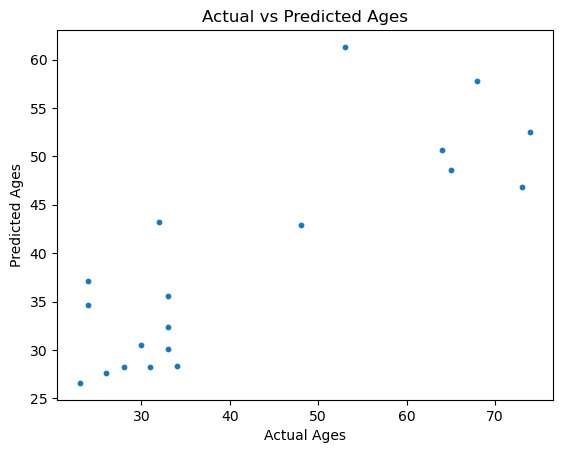

特徵重要程度:  [0.00490732 0.00113278 0.02721033 0.         0.02780869 0.01860811
 0.00895192 0.00575386 0.07428508 0.00559786 0.         0.01966854
 0.01351398 0.         0.         0.         0.         0.
 0.00311234 0.02164418 0.024677   0.20706825 0.11175209 0.02606313
 0.01057748 0.02187348 0.00138043 0.07412056 0.         0.
 0.         0.         0.         0.01430392 0.         0.
 0.         0.03129313 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01014096 0.05266543 0.01650053 0.01681611 0.04710046 0.00492123
 0.08632903 0.00749049 0.00273134]


In [954]:
X_train, X_test, y_train, y_test = train_test_split(df, age, test_size=0.2)#, random_state=0)
# n_jobs=-1處理器全開
xgbrModel = xgb.XGBRegressor(n_estimators=10, n_jobs=-1, max_depth = 5,
                             colsample_bytree = 1, gamma = 0, min_child_weight = 3,
                            subsample = 0.9, eval_metric="rmse")  
# 創建k折交叉驗證對象
kf = KFold(n_splits=10, shuffle=True)

# 進行 k-fold cross-validation，例如 k=10
scores = cross_val_score(xgbrModel, df, age, cv=kf)
print('Cross-validation scores: ', scores)

# train model with early stopping
eval_set = [(X_test, y_test)]
xgbrModel.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_pred = xgbrModel.predict(X_test)

# 計算均方誤差（Mean Squared Error, MSE）
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# 計算平均絕對誤差（Mean Absolute Error, MAE）
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# 預測成功的比例
print('Train Set score: ',xgbrModel.score(X_train,y_train))
print('Test Set score: ',xgbrModel.score(X_test,y_test))
# 計算皮爾森相關係數
corr, _ = pearsonr(y_test, y_pred)
print(f'Pearson correlation: {corr}')
plt.scatter(y_test, y_pred, s=10, label='True')
plt.xlabel('Actual Ages')
plt.ylabel('Predicted Ages')
plt.title('Actual vs Predicted Ages')
plt.show()

    
print('特徵重要程度: ',xgbrModel.feature_importances_)

{'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 5, 'subsample': 0.8}
[0]	validation_0-rmse:16.56337
[1]	validation_0-rmse:15.73757
[2]	validation_0-rmse:15.34708
[3]	validation_0-rmse:15.49597
[4]	validation_0-rmse:15.61029
Mean Squared Error (MSE): 166.3891326122585
Mean Absolute Error (MAE): 8.314944819400186
Train Set score:  0.6711054124416063
Test Set score:  0.010990929742396016
Pearson correlation: 0.23241169090494135


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


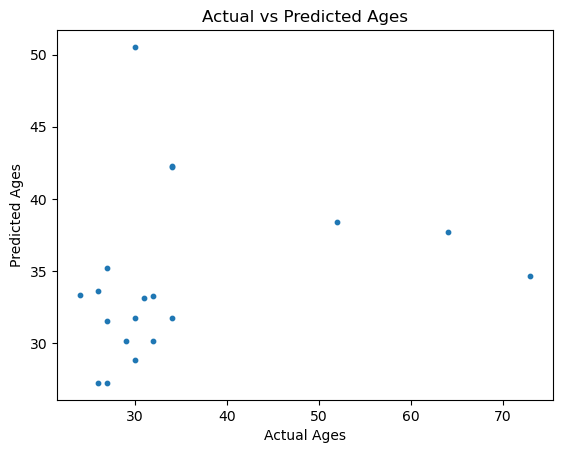

Feature importances:  [0.01270707 0.0059     0.10687911 0.00511471 0.00467452 0.
 0.         0.01612665 0.03826911 0.03665753 0.         0.00854551
 0.19997    0.         0.         0.         0.         0.
 0.         0.01982099 0.04807736 0.23014824 0.03512966 0.
 0.06376006 0.00925467 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01273121 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.10357261 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02561776 0.         0.01704321 0.         0.
 0.         0.         0.        ]


In [776]:
from sklearn.model_selection import GridSearchCV
# 定義要調整的參數範圍
param_grid = {
    'n_estimators':[5, 6, 7, 8, 9, 10, 15, 20, 30, 50],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
    # 其他參數...
}

# 創建模型
model = xgb.XGBRegressor(n_jobs=-1)

# 創建網格搜索對象
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# 進行網格搜索
grid_search.fit(X_train, y_train)

# 輸出最佳參數
print(grid_search.best_params_)


# 使用最佳參數創建新的模型
xgbrModel = xgb.XGBRegressor(n_jobs=-1,
                             n_estimators=grid_search.best_params_['n_estimators'], 
                             max_depth=grid_search.best_params_['max_depth'], 
                             min_child_weight=grid_search.best_params_['min_child_weight'], 
                             gamma=grid_search.best_params_['gamma'], 
                             subsample=grid_search.best_params_['subsample'], 
                             colsample_bytree=grid_search.best_params_['colsample_bytree'])

# 將一部分訓練數據作為驗證集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# 使用早停法訓練模型
xgbrModel.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)])

# RFR

In [502]:
def RandomForestRegression(X, y, test_size=0.3, n_estimators=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)#, random_state=0)
    # n_jobs=-1處理器全開
    RFR = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)# , random_state=0
    # 進行 k-fold cross-validation，例如 k=10
    scores = cross_val_score(RFR, X, y, cv=10)
    print('Cross-validation scores: ', scores)

    # train model
    RFR.fit(X_train, y_train)

    y_pred = RFR.predict(X_test)

    # 計算均方誤差（Mean Squared Error, MSE）
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    # 計算平均絕對誤差（Mean Absolute Error, MAE）
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    # 預測成功的比例
    print('Train Set score: ',RFR.score(X_train,y_train))
    print('Test Set score: ',RFR.score(X_test,y_test))

    # 計算皮爾森相關係數
    corr, _ = pearsonr(y_test, y_pred)
    print(f'Pearson correlation: {corr}')

    plt.scatter(y_test, y_pred, s=10, label='True')
    plt.xlabel('Actual Ages')
    plt.ylabel('Predicted Ages')
    plt.title('Actual vs Predicted Ages')
    plt.show()
    
    
    print('特徵重要程度: ',RFR.feature_importances_)
    #print('樹的深度: ',RFR.get_depth)

Cross-validation scores:  [-222.20898876 -561.172         0.          -76.60833333 -231.43727273
 -227.04875    -806.345        -1.91726891  -11.43093333  -52.20598837]
Mean Squared Error (MSE): 109.87464285714285
Mean Absolute Error (MAE): 7.45357142857143
Train Set score:  0.8093209433557211
Test Set score:  0.3820669569521461
Pearson correlation: 0.6442400053418984


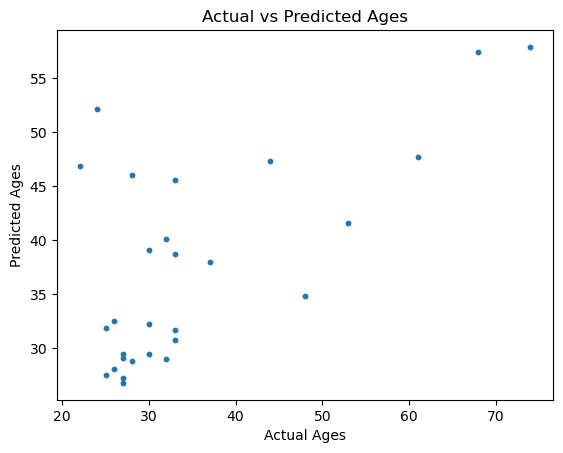

特徵重要程度:  [1.80149117e-02 2.82049306e-02 2.84011430e-03 1.84487700e-02
 2.19498260e-02 1.55690621e-03 5.17457534e-03 3.05069926e-02
 8.80807488e-03 6.24330705e-02 1.19080632e-02 9.75180253e-04
 1.47597714e-03 1.14714940e-04 4.10931699e-03 3.27370252e-03
 2.49852902e-03 3.20017763e-02 2.96694838e-03 4.91301696e-02
 8.68358599e-03 9.88771586e-06 2.66478733e-02 5.92857105e-02
 5.61503988e-06 3.73982641e-03 4.46787168e-04 4.03832271e-03
 2.92926771e-04 3.63387106e-02 7.16388486e-04 5.17401918e-02
 2.71475140e-05 2.88508621e-03 4.75610608e-03 6.05184763e-04
 6.07685866e-05 3.09776135e-03 3.22575039e-03 0.00000000e+00
 4.42373351e-04 6.18599956e-02 7.84830235e-02 1.00756975e-03
 2.23014829e-04 3.44828297e-03 7.27216305e-02 0.00000000e+00
 3.86290501e-03 1.84705949e-03 6.23353876e-05 4.43856152e-03
 6.71253070e-03 2.59757354e-03 7.26361474e-06 2.46853245e-03
 2.79861514e-02 2.79001468e-04 2.74670643e-03 1.25663878e-04
 9.09926727e-04 6.69658619e-02 5.24826030e-02 2.18648793e-02
 4.29822788e-05

In [510]:
RandomForestRegression(df, age, test_size=0.3, n_estimators=10)

# 沒有取交集的

In [51]:
# 將top200 的 gene 挑出來
def select_anndata(anndata, df, cell_type):
    # 先挑 cell type
    select_celltype = anndata[anndata.obs.cell_type == cell_type]
    # 在取交集
    negative = set(df.iloc[1]).intersection(set(anndata.var.gene_ids))
    negative_index = anndata.var.gene_ids.isin(negative)
    # 將挑好的cell type取出top 200 genes
    anndata_negative = select_celltype[:, negative_index]
    
    return anndata_negative


In [52]:
NK_negative = select_anndata(personal['HC-519'], negative_top200, "NK")

In [53]:
NK_negative

View of AnnData object with n_obs × n_vars = 131 × 200
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
N_mean_gene = {}
for i in mean_and_std.index:
    mean = []
    for j in range(len(NK_negative.X.T)):
        mean.append(float(np.mean(NK_negative.X.T[j])))
    N_mean_gene[i] = mean
N_mean_gene_df = pd.DataFrame(N_mean_gene)
N_mean_gene_df = N_mean_gene_df.T
N_mean_gene_df.columns = N_common_genes


P_mean_gene = {}
for i in mean_and_std.index:
    mean = []
    for j in range(len(NK_positive.X.T)):
        mean.append(float(np.mean(NK_positive.X.T[j])))
    P_mean_gene[i] = mean
P_mean_gene_df = pd.DataFrame(P_mean_gene)
P_mean_gene_df = P_mean_gene_df.T
P_mean_gene_df.columns = P_common_genes
mean

In [54]:
with open('mean_and_stdev_GSE174188.csv', 'r') as file:
    mean_and_std = pd.read_csv(file, index_col = 0)
#mean_and_std["N_NK"] = mean
mean_and_std

,age,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,std_Monocyte,std_DC
HC-519,21.0,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,0.637790,0.118725
HC-520,22.0,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,0.588125,0.341599
IGTB1974_IGTB1974,23.0,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,0.680489,0.182131
IGTB1916_IGTB1916,23.0,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,0.672437,0.190104
IGTB1987_IGTB1987,23.0,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,0.713794,0.174472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,68.0,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,0.852107,0.109943
HC-536,71.0,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,0.625976,0.123043
HC-524,73.0,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,0.790643,0.326397
HC-022,74.0,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,0.604755,0.164673


In [57]:
mean_gene = {}
for i in mean_and_std.index:
    mean = []
    for j in range(len(NK_negative.X.T)):
        mean.append(float(np.mean(NK_negative.X.T[j])))
    mean_gene[i] = mean